In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score
sns.set()

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 599 non-null    int64  
 1   gender             599 non-null    object 
 2   age                599 non-null    float64
 3   hypertension       599 non-null    int64  
 4   heart_disease      599 non-null    int64  
 5   ever_married       599 non-null    object 
 6   work_type          599 non-null    object 
 7   Residence_type     599 non-null    object 
 8   avg_glucose_level  599 non-null    float64
 9   bmi                553 non-null    float64
 10  smoking_status     599 non-null    object 
 11  stroke             599 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 56.3+ KB


In [4]:
mean = data['bmi'].mean().round(2)
data['bmi'].fillna(value = mean, inplace = True)
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
data = data.drop(['id','ever_married'],axis = 1)

In [6]:
features_cat = ['gender','hypertension','heart_disease','Residence_type',
                'work_type','smoking_status']

In [7]:
features_num = ['age', 'avg_glucose_level','bmi']
data[features_num].describe()

,age,avg_glucose_level,bmi
count,599.000000,599.000000,599.000000
mean,52.776361,119.875943,30.054591
std,22.356089,54.947911,7.626833
min,0.320000,55.390000,13.800000
25%,38.000000,79.085000,25.200000
50%,57.000000,97.930000,29.500000
75%,72.000000,146.745000,33.850000
max,82.000000,271.740000,71.900000


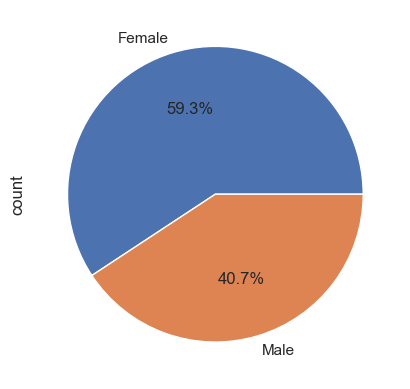

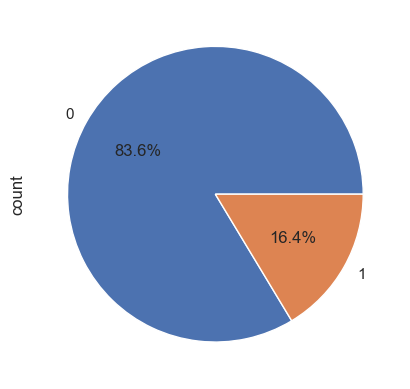

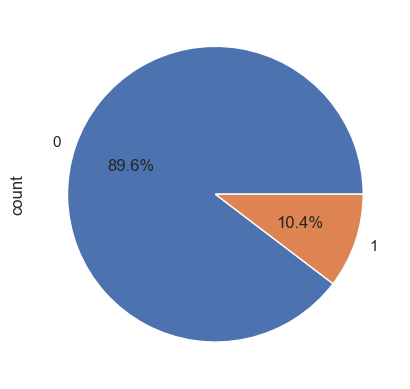

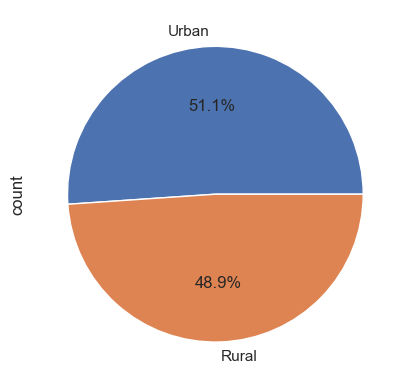

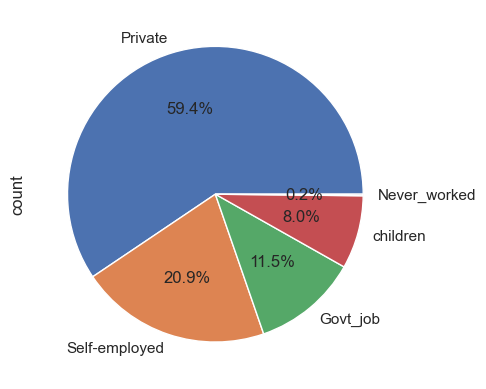

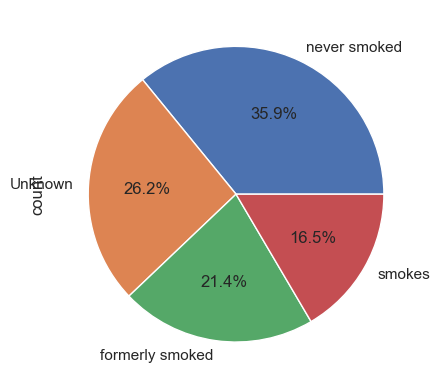

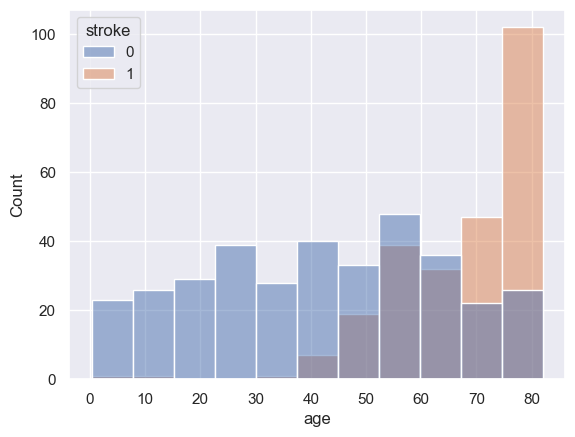

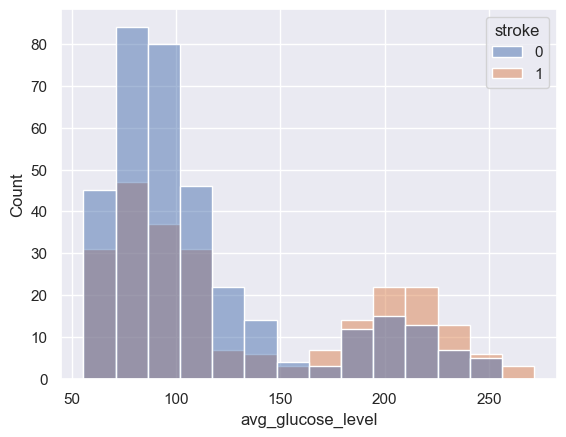

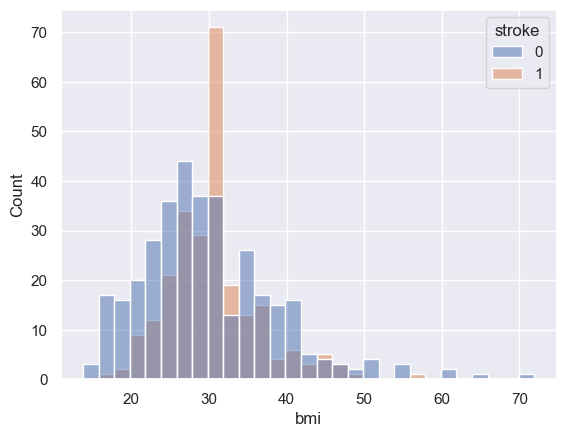

In [8]:
for f in features_cat:
    data[f].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
    plt.show()
for i in features_num:
    sns.histplot(x= i,hue = 'stroke', data=data)
    plt.show()

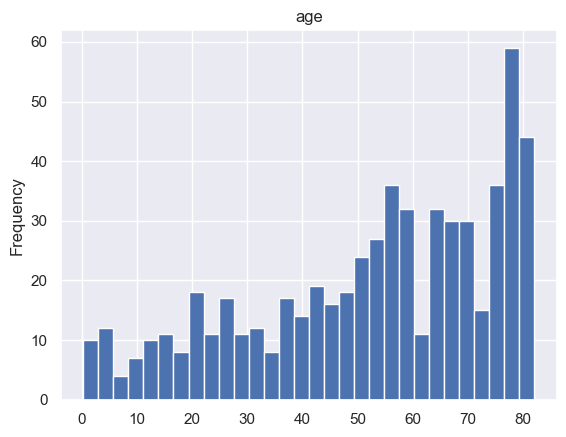

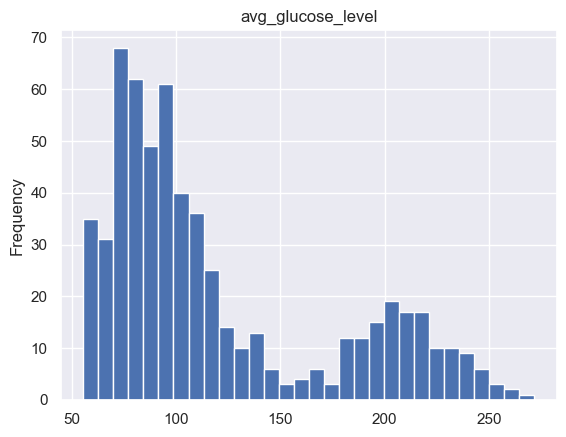

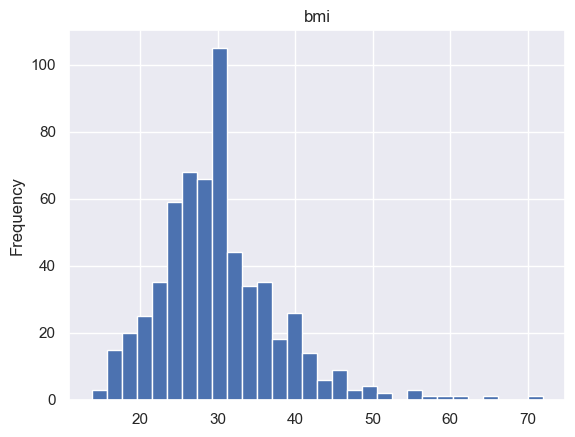

In [9]:
for i in features_num:
    data[i].plot(kind='hist', bins=30)
    plt.title(i)
    plt.show()

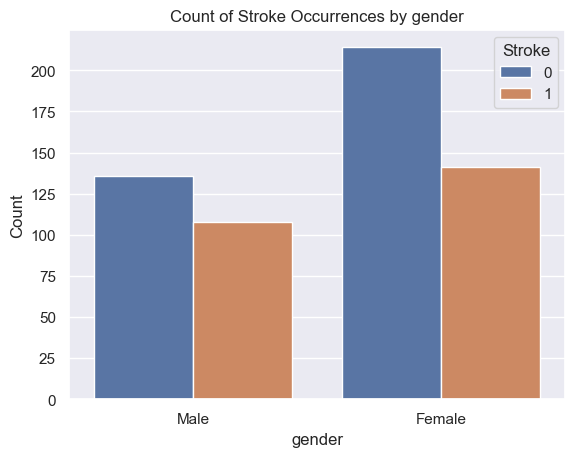

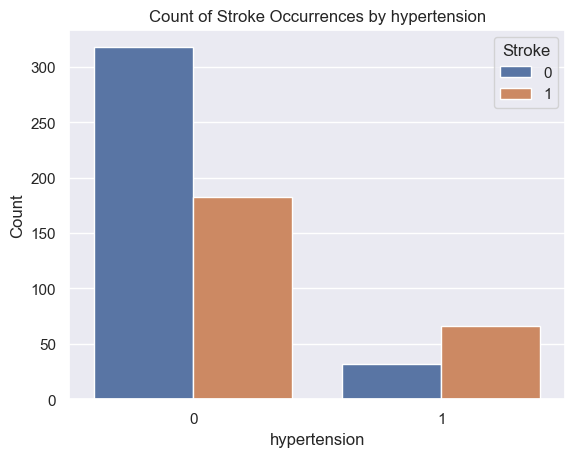

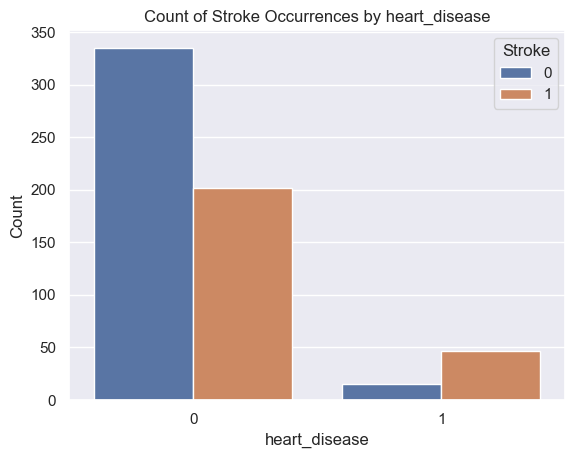

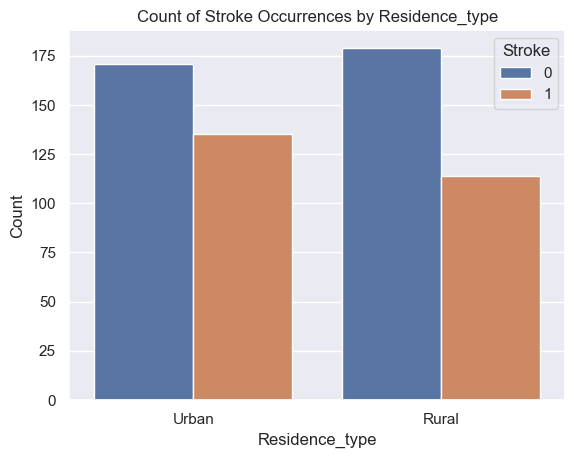

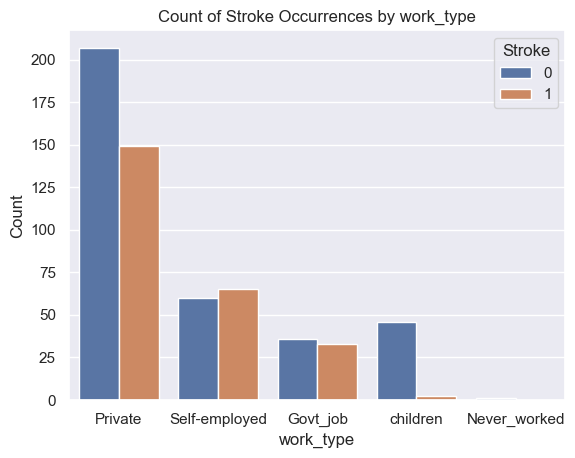

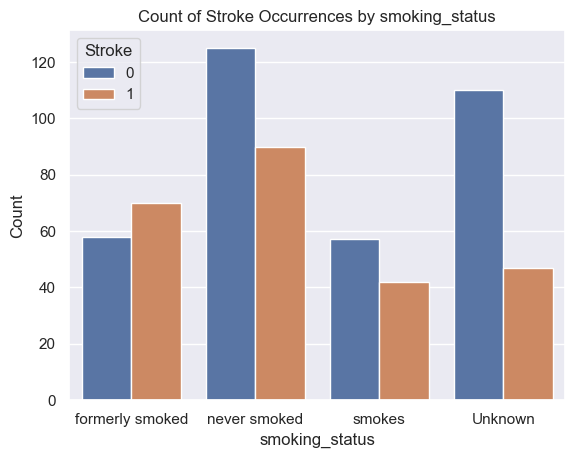

In [10]:
for f in features_cat:
    sns.countplot(data=data, x=f, hue='stroke')
    plt.title('Count of Stroke Occurrences by ' + f)
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.legend(title='Stroke')
    plt.show()


In [11]:
def create_contingency_table(dataframe):
    table=[]
    for i in range(len(dataframe)):
        col = []
        for j in range(len(dataframe.columns)):
            col.append(dataframe[dataframe.columns[j]][i])
        table.append(col)
    return table

def chi_square_test(table):

    from scipy.stats import chi2_contingency
    from scipy.stats import chi2
    stat, p, dof, expected = chi2_contingency(table)
    print('Degree of freedom: ', dof)
    print('Stat is: ', stat)
    print('P-value is: ',p)
    print('Expected frquencies: ',expected)
    
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Critical value=%.3f, Stat=%.3f' % (critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')




### Stroke and smoking_status

In [12]:
data_stroke_smoking = pd.crosstab(data['stroke'],data['smoking_status'])
print(data_stroke_smoking)
table = create_contingency_table(data_stroke_smoking)
print(table)
chi_square_test(table)

smoking_status  Unknown  formerly smoked  never smoked  smokes
stroke                                                        
0                   110               58           125      57
1                    47               70            90      42
[[110, 58, 125, 57], [47, 70, 90, 42]]
Degree of freedom:  3
Stat is:  17.85318679437493
P-value is:  0.0004716037740681641
Expected frquencies:  [[ 91.73622705  74.79131886 125.62604341  57.84641068]
 [ 65.26377295  53.20868114  89.37395659  41.15358932]]
Critical value=7.815, Stat=17.853
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


###   Stroke and work_type

In [13]:
data_stroke_work = pd.crosstab(data['stroke'],data['work_type'])
print(data_stroke_work)
table = create_contingency_table(data_stroke_work)
print(table)
chi_square_test(table)

work_type  Govt_job  Never_worked  Private  Self-employed  children
stroke                                                             
0                36             1      207             60        46
1                33             0      149             65         2
[[36, 1, 207, 60, 46], [33, 0, 149, 65, 2]]
Degree of freedom:  4
Stat is:  35.08052363790192
P-value is:  4.471744110691926e-07
Expected frquencies:  [[ 40.31719533   0.58430718 208.01335559  73.03839733  28.04674457]
 [ 28.68280467   0.41569282 147.98664441  51.96160267  19.95325543]]
Critical value=9.488, Stat=35.081
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Stroke and hypertension

In [14]:
data_stroke_hypertension = pd.crosstab(data['stroke'],data['hypertension'])
print(data_stroke_hypertension)
table = create_contingency_table(data_stroke_hypertension)
print(table)
chi_square_test(table)

hypertension    0   1
stroke               
0             318  32
1             183  66
[[318, 32], [183, 66]]
Degree of freedom:  1
Stat is:  30.798129686684916
P-value is:  2.8631368077223e-08
Expected frquencies:  [[292.73789649  57.26210351]
 [208.26210351  40.73789649]]
Critical value=3.841, Stat=30.798
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


### Stroke and Bmi

In [15]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data['bmi_cat'] = data['bmi'].apply(categorize_bmi)

In [16]:
data_stroke_bmi = pd.crosstab(data['stroke'],data['bmi_cat'])
print(data_stroke_bmi)
table = create_contingency_table(data_stroke_bmi)
print(table)
chi_square_test(table)


bmi_cat  Normal weight  Obese  Overweight  Underweight
stroke                                                
0                   78    151          97           24
1                   35    141          72            1
[[78, 151, 97, 24], [35, 141, 72, 1]]
Degree of freedom:  3
Stat is:  25.251389625848446
P-value is:  1.3680128913898661e-05
Expected frquencies:  [[ 66.02671119 170.61769616  98.74791319  14.60767947]
 [ 46.97328881 121.38230384  70.25208681  10.39232053]]
Critical value=7.815, Stat=25.251
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


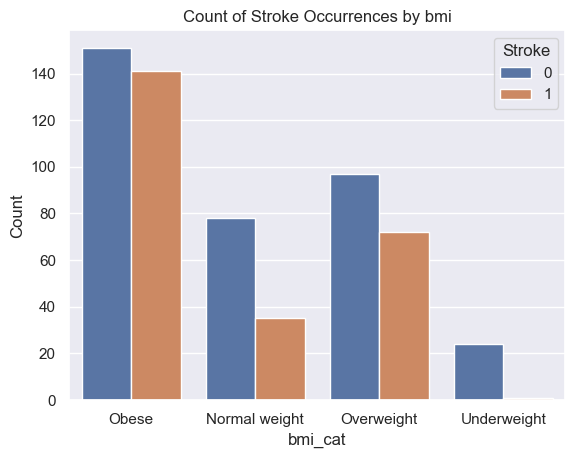

In [17]:
sns.countplot(data=data, x='bmi_cat', hue='stroke')
plt.title('Count of Stroke Occurrences by bmi'  )
plt.xlabel('bmi_cat')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

### Stroke and heart_disease

In [18]:

data_stroke_heart = pd.crosstab(data['stroke'],data['heart_disease'])
print(data_stroke_heart)
table = create_contingency_table(data_stroke_heart)
print(table)
chi_square_test(table)



heart_disease    0   1
stroke                
0              335  15
1              202  47
[[335, 15], [202, 47]]
Degree of freedom:  1
Stat is:  31.821590616255925
P-value is:  1.6900360584179345e-08
Expected frquencies:  [[313.77295492  36.22704508]
 [223.22704508  25.77295492]]
Critical value=3.841, Stat=31.822
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [19]:
data_stroke_residence = pd.crosstab(data['stroke'],data['Residence_type'])
print(data_stroke_residence)
table = create_contingency_table(data_stroke_residence)
print(table)
chi_square_test(table)


Residence_type  Rural  Urban
stroke                      
0                 179    171
1                 114    135
[[179, 171], [114, 135]]
Degree of freedom:  1
Stat is:  1.4649788323249961
P-value is:  0.22613959488961
Expected frquencies:  [[171.20200334 178.79799666]
 [121.79799666 127.20200334]]
Critical value=3.841, Stat=1.465
Independent (fail to reject H0)
significance=0.050, p=0.226
Independent (fail to reject H0)


## Stroke and Gender

In [20]:
data_stroke_smoking = pd.crosstab(data['stroke'],data['gender'])
print(data_stroke_smoking)
table = create_contingency_table(data_stroke_smoking)
print(table)
chi_square_test(table)

gender  Female  Male
stroke              
0          214   136
1          141   108
[[214, 136], [141, 108]]
Degree of freedom:  1
Stat is:  1.0493211713165267
P-value is:  0.3056634789994407
Expected frquencies:  [[207.42904841 142.57095159]
 [147.57095159 101.42904841]]
Critical value=3.841, Stat=1.049
Independent (fail to reject H0)
significance=0.050, p=0.306
Independent (fail to reject H0)


In [21]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [22]:
gender = enc.fit_transform(data['gender'])
work_type = enc.fit_transform(data['work_type'])
Residence_type = enc.fit_transform(data['Residence_type'])
smoking_status = enc.fit_transform(data['smoking_status'])

data['gender'] = gender
data['work_type'] = work_type
data['Residence_type'] = Residence_type
data['smoking_status'] = smoking_status



In [23]:
X = data.drop(['stroke','bmi_cat'],axis =1 )
y = data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state =1001)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((419, 9), (419,), (180, 9), (180,))

In [24]:
from sklearn.linear_model import LogisticRegression
# Fit the model
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

# Make predictions
prediction1 = model_LR.predict(X_test)

# Print classification report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       104
           1       0.70      0.76      0.73        76

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.77      0.76      0.76       180



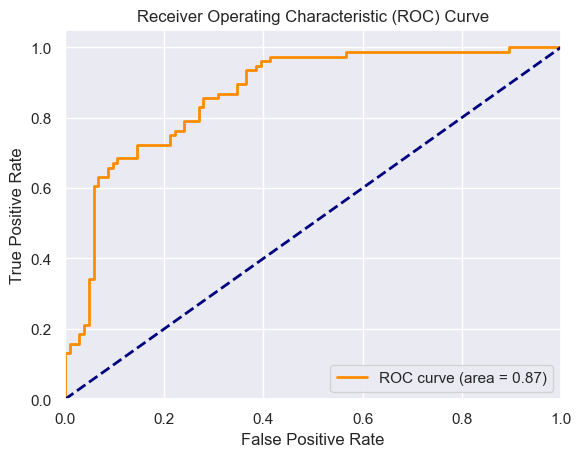

In [25]:
from sklearn.metrics import roc_curve, auc, classification_report
# Get predicted probabilities
y_pred_prob = model_LR.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
coef = model_LR.coef_
inter = model_LR.intercept_
print(coef,inter)

[[ 1.09196858e-01  7.18225085e-02  4.57298469e-01  5.73961619e-01
  -8.84747952e-02  2.93576574e-02 -5.57514065e-04 -6.72593341e-03
  -5.60950036e-02]] [-4.07619643]


## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
# Fit the model
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

# Make predictions
target_pred = model_DT.predict(X_test)

# Print classification report
print(classification_report(y_test, target_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       104
           1       0.60      0.62      0.61        76

    accuracy                           0.67       180
   macro avg       0.66      0.66      0.66       180
weighted avg       0.67      0.67      0.67       180



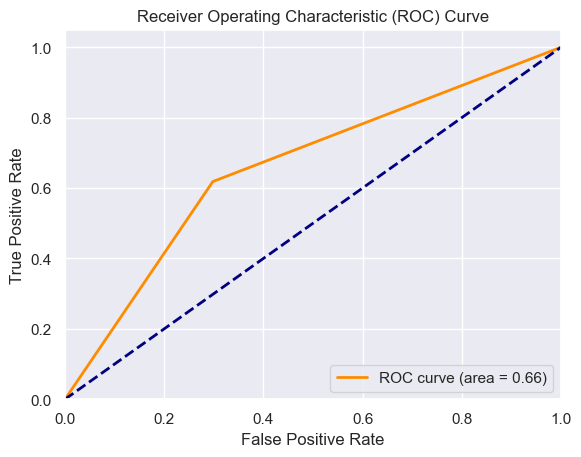

In [28]:
# Get predicted probabilities
y_pred_prob = model_DT.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [29]:
# Feature importances
feature_importances = model_DT.feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f'{feature}: {importance}')

gender: 0.01673715870106678
age: 0.446325762387634
hypertension: 0.044376903760274686
heart_disease: 0.0074354973323554506
work_type: 0.022543496654247402
Residence_type: 0.046173244373935204
avg_glucose_level: 0.20270720549584295
bmi: 0.165631066091962
smoking_status: 0.04806966520268155


## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Fit the model
rf_classification = RandomForestClassifier()
rf_model = rf_classification.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       104
           1       0.71      0.76      0.73        76

    accuracy                           0.77       180
   macro avg       0.76      0.77      0.76       180
weighted avg       0.77      0.77      0.77       180



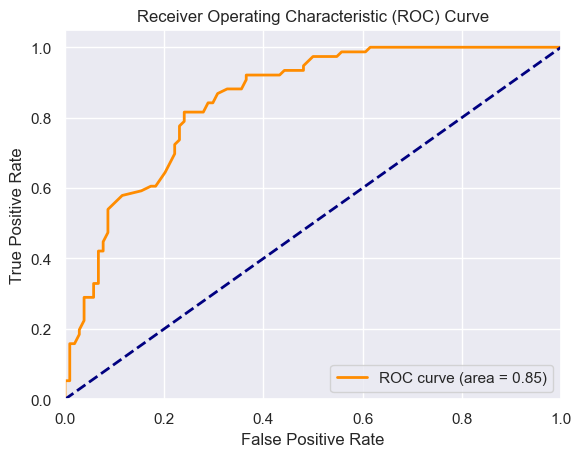

In [31]:
# Get predicted probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [32]:
# Feature importances
feature_importances = rf_model.feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f'{feature}: {importance}')

gender: 0.02324810399291245
age: 0.3829250524651554
hypertension: 0.044660021929338496
heart_disease: 0.022765372245106642
work_type: 0.050561166444391785
Residence_type: 0.027780892311163482
avg_glucose_level: 0.19995112285084227
bmi: 0.1864935493030888
smoking_status: 0.0616147184580007


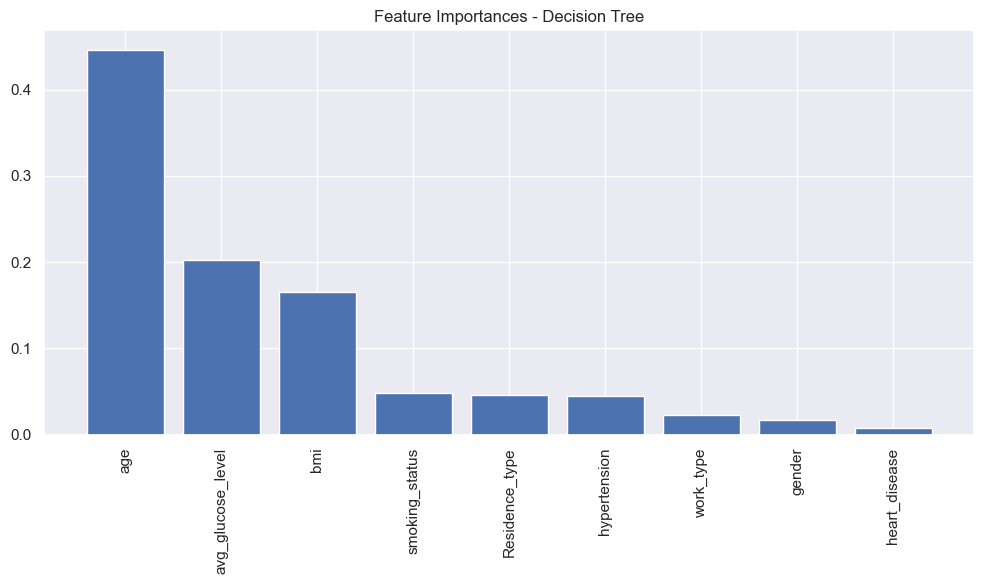

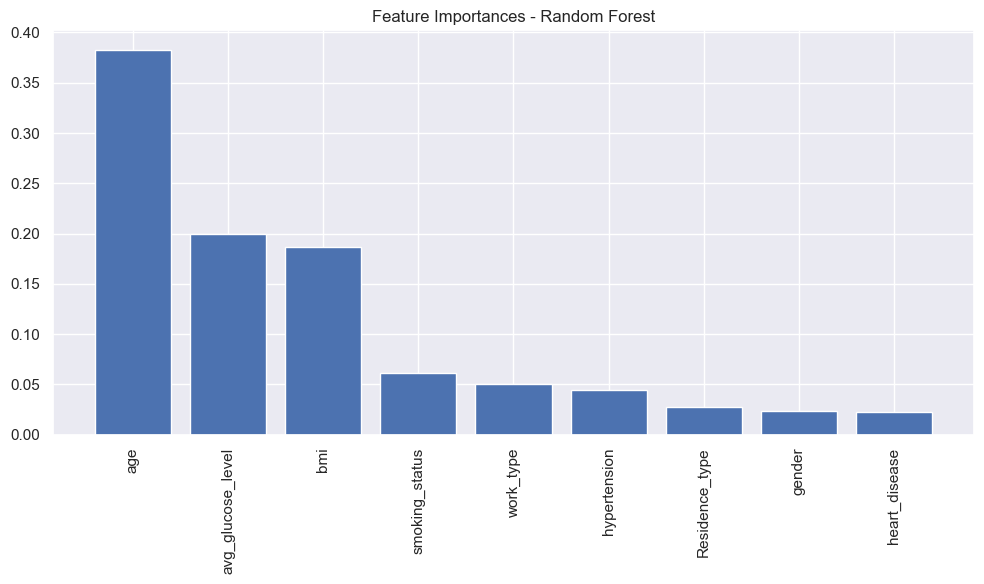

In [33]:
# For Decision Tree
importances = model_DT.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Decision Tree')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# For Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances - Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


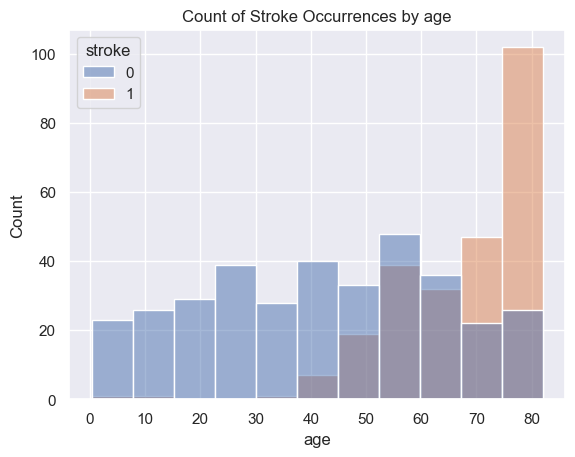

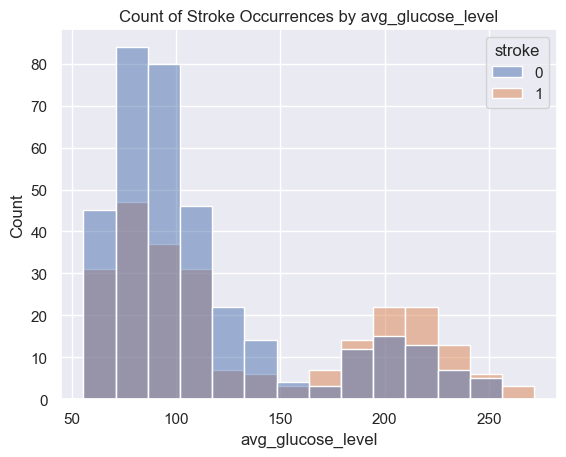

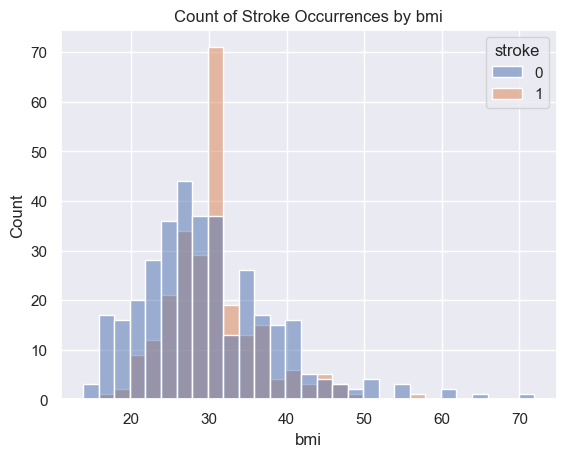

In [34]:
for i in features_num:
    sns.histplot(data=data, x=i, hue='stroke')
    plt.title('Count of Stroke Occurrences by ' + i)
    plt.xlabel(i)
    plt.ylabel('Count')
    
    plt.show()

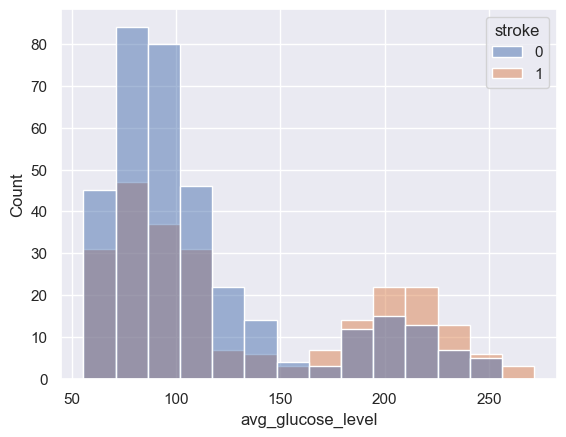

In [35]:
sns.histplot(x='avg_glucose_level',hue = 'stroke', data=data)
plt.show()